### Understanding and preprocessing the data

**Importing libraries and dataset**

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = "data/teste_indicium_precificacao.csv"
dataset = pd.read_csv(dataset_path)

In [114]:
# printing the first 5 data rows
dataset.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [115]:
# dataset shape
dataset.shape

(48894, 16)

In [116]:
# making a copy of the dataset
dataset_c = dataset.copy()

In [117]:
dataset.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [119]:
# checking the missing values
dataset.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

- "ultima_review" and "reviews_por_mes" have the most missing data, so we can remove these two columns;
- "host_name": 21 missing values
- "nome": 16 missing values

<Axes: >

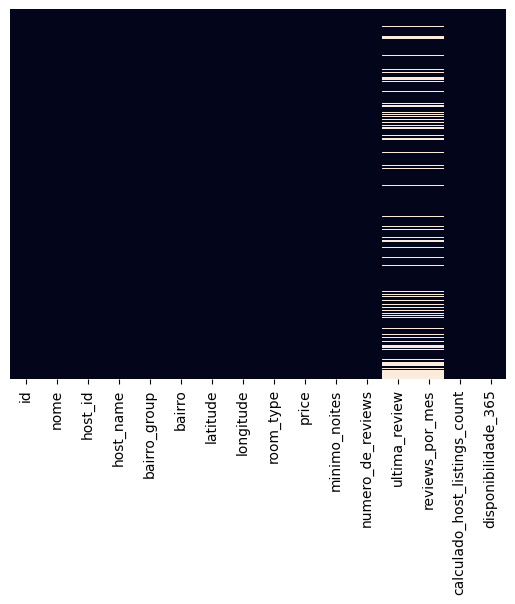

In [120]:
# visualizing the missing values
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [121]:
# drop "ultima_review" and "reviews_por_mes" columns
dataset.drop(columns = ["ultima_review", "reviews_por_mes"], axis=1, inplace=True)

In [122]:
dataset.shape

(48894, 14)

In [123]:
# checking the missing values
dataset.isnull().sum()

id                                0
nome                             16
host_id                           0
host_name                        21
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
calculado_host_listings_count     0
disponibilidade_365               0
dtype: int64

In [124]:
print(dataset.nome.unique())
print(f"Number of unique values in 'nome': {len(dataset.nome.unique())}")

['Skylit Midtown Castle' 'THE VILLAGE OF HARLEM....NEW YORK !'
 'Cozy Entire Floor of Brownstone' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
Number of unique values in 'nome': 47905


In [125]:
print(dataset.host_name.unique())
print(f"Number of unique values in 'host_name': {len(dataset.host_name.unique())}")

['Jennifer' 'Elisabeth' 'LisaRoxanne' ... 'Abayomi' 'Alberth'
 'Ilgar & Aysel']
Number of unique values in 'host_name': 11453


In [126]:
# categorize the features by its type
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print(f"categorical variables: {len(object_cols)}")

int_ = (dataset.dtypes == 'int64')
int_cols = list(int_[int_].index)
print(f"integer variables: {len(int_cols)}")

float_ = (dataset.dtypes == 'float')
float_cols = list(float_[float_].index)
print(f"float variables: {len(float_cols)}")

categorical variables: 5
integer variables: 7
float variables: 2


<Axes: title={'center': 'Number of unique values of categorical features'}>

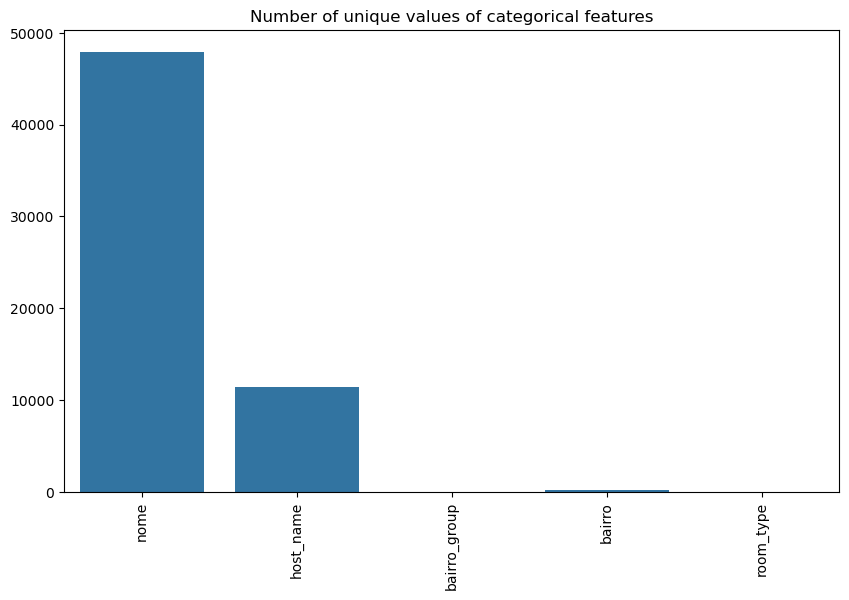

In [127]:
# plot the distribution of unique values in the categorical features
unique_values = []
for col in object_cols:
    unique_values.append(dataset_c[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('Number of unique values of categorical features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

- "name" has the higher number of unique values, followed by the "host_name" and "ultima_review";
- "name" and "host_name" can be dropped.

In [128]:
# dropping "nome" and "host_name" columns
dataset = dataset.drop(columns = ['nome', 'host_name'])
dataset.head()

,id,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
0,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
1,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
2,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
3,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
4,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129


In [129]:
dataset.shape

(48894, 12)

**Handling categorical data**
1. "bairro_group";
2. "bairro";
3. "room_type";

In [130]:
# categorize the features by its type
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print(f"categorical variables: {len(object_cols)}")

int_ = (dataset.dtypes == 'int64')
int_cols = list(int_[int_].index)
print(f"integer variables: {len(int_cols)}")

float_ = (dataset.dtypes == 'float')
float_cols = list(float_[float_].index)
print(f"float variables: {len(float_cols)}")

categorical variables: 3
integer variables: 7
float variables: 2


In [131]:
# data types
print(f"dataset types: \n{dataset.dtypes}")

dataset types: 
id                                 int64
host_id                            int64
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object


In [132]:
# check the unique values
print(dataset.bairro_group.unique())
print(dataset.room_type.unique())

['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Entire home/apt' 'Private room' 'Shared room']


In [133]:
print(dataset.bairro.unique())

['Midtown' 'Harlem' 'Clinton Hill' 'East Harlem' 'Murray Hill'
 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side' 'Chinatown'
 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene' 'Chelsea'
 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood' 'East Village'
 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Kensington' 'Clason Point' 'Eastchester'
 'Kingsbridge' 'Two Bridges' 'Queens Village' 'Rockaway Beach'
 'Forest Hills' 'Nolita' 'Woodlawn' 'University Heights' '

In [134]:
# making a copy of our data for future use
data_df = dataset.copy()

In [135]:
# perform one hot encoding
col_for_dummies = ['bairro_group', 'bairro', 'room_type']
dataset = pd.get_dummies(data=dataset, columns=col_for_dummies, drop_first=True)

In [136]:
dataset.head()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,bairro_group_Brooklyn,...,bairro_Williamsbridge,bairro_Williamsburg,bairro_Willowbrook,bairro_Windsor Terrace,bairro_Woodhaven,bairro_Woodlawn,bairro_Woodrow,bairro_Woodside,room_type_Private room,room_type_Shared room
0,2595,2845,40.75362,-73.98377,225,1,45,2,355,False,...,False,False,False,False,False,False,False,False,False,False
1,3647,4632,40.80902,-73.94190,150,3,0,1,365,False,...,False,False,False,False,False,False,False,False,True,False
2,3831,4869,40.68514,-73.95976,89,1,270,1,194,True,...,False,False,False,False,False,False,False,False,False,False
3,5022,7192,40.79851,-73.94399,80,10,9,1,0,False,...,False,False,False,False,False,False,False,False,False,False
4,5099,7322,40.74767,-73.97500,200,3,74,1,129,False,...,False,False,False,False,False,False,False,False,False,False


In [137]:
# before the one hot encoding
print(dataset.shape)

# after the one hot encoding
print(dataset_c.shape)

(48894, 235)
(48894, 16)


In [138]:
dataset.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimo_noites',
       'numero_de_reviews', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group_Brooklyn',
       ...
       'bairro_Williamsbridge', 'bairro_Williamsburg', 'bairro_Willowbrook',
       'bairro_Windsor Terrace', 'bairro_Woodhaven', 'bairro_Woodlawn',
       'bairro_Woodrow', 'bairro_Woodside', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object', length=235)

### Exploratory data analysis (EDA)

In [139]:
dataset.dtypes

id                          int64
host_id                     int64
latitude                  float64
longitude                 float64
price                       int64
                           ...   
bairro_Woodlawn              bool
bairro_Woodrow               bool
bairro_Woodside              bool
room_type_Private room       bool
room_type_Shared room        bool
Length: 235, dtype: object

In [140]:
# categorize the features by its type
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print(f"categorical variables: {len(object_cols)}")

int_ = (dataset.dtypes == 'int64')
int_cols = list(int_[int_].index)
print(f"integer variables: {len(int_cols)}")

float_ = (dataset.dtypes == 'float')
float_cols = list(float_[float_].index)
print(f"float variables: {len(float_cols)}")

bool_ = (dataset.dtypes == 'bool')
bool_cols = list(float_[bool_].index)
print(f"bool variables: {len(bool_cols)}")

categorical variables: 0
integer variables: 7
float variables: 2
bool variables: 226


<Axes: >

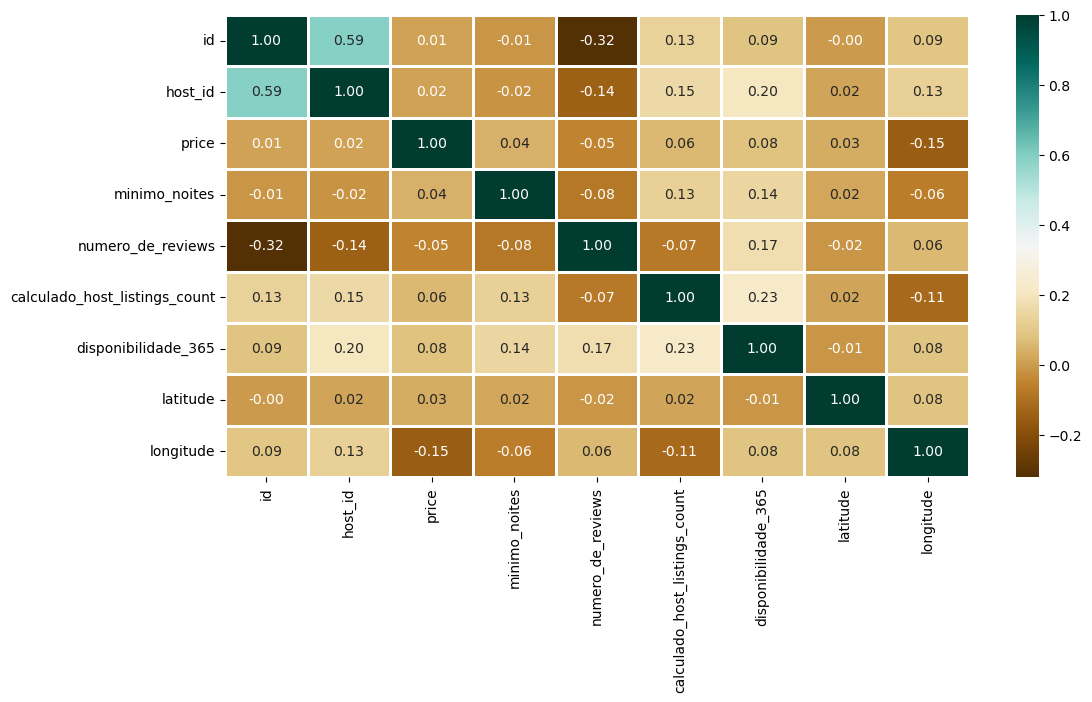

In [141]:
# heatmap of the original data

# select the features with types integer and float
names = int_cols + float_cols
# print(len(names))

num_df = data_df[names]
# print(num_df.dtypes)
# print(num_df)

plt.figure(figsize=(12, 6))
sns.heatmap(num_df.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)

- The 8 features, in general, do not cause significant changes in price. The top four are "disponibilidade_365" (0.08), "calculado_host_listings_count" (0.06), "minimo_noites" (0.04) and "latitude" (0.03).

<Axes: xlabel='price', ylabel='Density'>

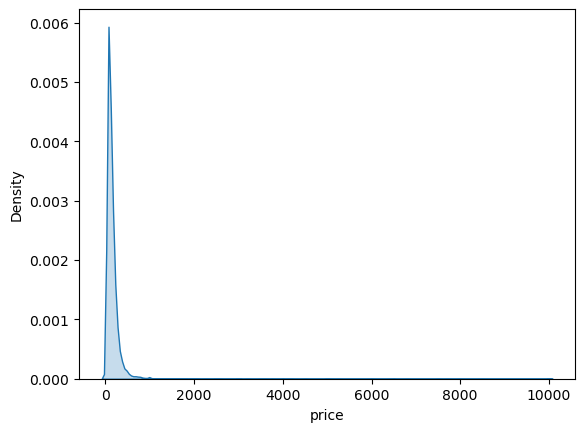

In [142]:
# density plot
sns.kdeplot(data=dataset['price'],fill=True)

- The density plot shows that the price values are more concentrated between 0 and 1000 dollars approximately.

In [143]:
dataset['price'].describe()

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [144]:
# shows the first five rows of the original data
data_df.head()

,id,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
0,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
1,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
2,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
3,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
4,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129


<Axes: xlabel='price', ylabel='disponibilidade_365'>

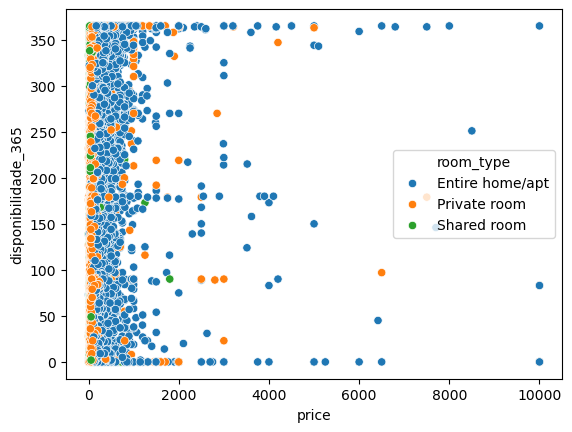

In [145]:
sns.scatterplot(x=data_df['price'],y=data_df['disponibilidade_365'],hue=data_df['room_type'])

- The price varies more and is higher when the room type is "Entire home/apt";
- The relationship between price and availability is not linear;
- The quantity of the rooms rene  dof the tp"e entire homea"pt is higher than the room tp"e private o"om regardless of the number of days in which the ad available.

<Axes: xlabel='price', ylabel='room_type'>

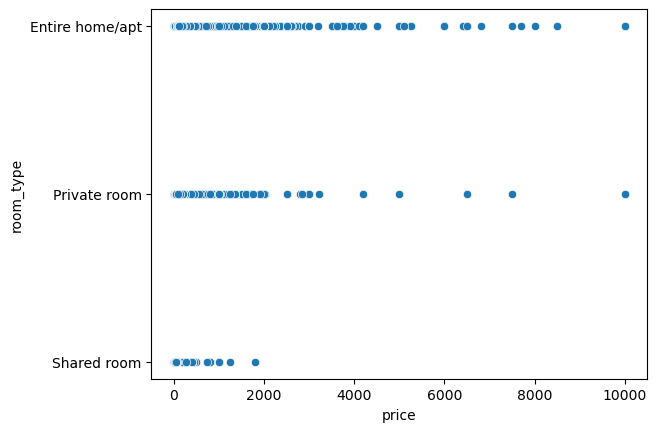

In [146]:
sns.scatterplot(x=data_df['price'],y=data_df['room_type'])

<Axes: xlabel='price', ylabel='bairro_group'>

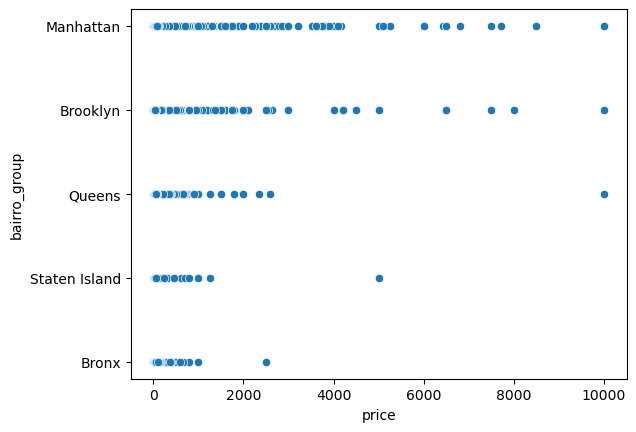

In [147]:
sns.scatterplot(x=data_df['price'],y=data_df['bairro_group'])

- The price is higher when the place is in Manhattan and it is cheaper when the place is in Bronx;

<Axes: xlabel='price', ylabel='bairro'>

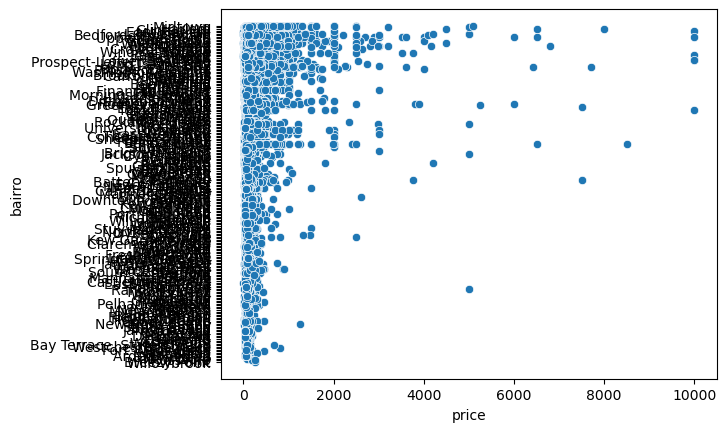

In [148]:
sns.scatterplot(x=data_df['price'],y=data_df['bairro'])

In [149]:
dataset.shape

(48894, 235)

**Save the updated data in CSV format**

In [150]:
dataset.to_csv("data_after_EDA.csv")